# Basic Functions for the Analysis (w. Examples)


In [2]:
# Import necessary packages
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
! jupyter nbextension enable --py --sys-prefix widgetsnbextension
! jupyter nbextension install --py --symlink --sys-prefix ipympl
%matplotlib widget

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Installing /Users/bojunfeng/opt/anaconda3/lib/python3.8/site-packages/ipympl/nbextension -> jupyter-matplotlib
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable ipympl --py --sys-prefix
    


In [4]:
# Save the nth frame of inpath to outpath in format "header_n.jpg"
# Remember to put "/" at the end of outpath
def save_nth_frame(inpath, n, outpath="/Users/bojunfeng/Downloads/", header=""):
    
    # Load the video
    cap= cv2.VideoCapture(inpath)
    # Get number for total frames
    total_frames = cap.get(7)
    
    # Check if imput is within correct bound
    if -1 < n and n < total_frames:
        # If so, get the image
        cap.set(1, n)
        ret, frame = cap.read()
        # Then save the file, naming it with the header
        if header == "":
            cv2.imwrite(outpath+str(n)+'.jpg',frame)
        else: 
            cv2.imwrite(outpath + header + "_" + str(n) + '.jpg',frame)
    else:
        # Raise an error if the input is not corerectly bounded
        print("ERROR save_nth_frame: Accessing " + str(n) + "th frame with total frame of " + str(total_frames))

In [5]:
fpath = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered_labeled.mp4"
opath = "/Users/bojunfeng/Desktop/"
n = 5600
header = "boomba"
save_nth_frame(fpath, n, "/Users/bojunfeng/Downloads/", header)

In [6]:
# Format the csv file
def format_csv(csvpath):
    
    # Load the csv file into a dataframe
    dataframe = pd.read_csv(csvpath)
    
    # Remove top lines before "bodyparts"
    while not "bodyparts" == dataframe.iloc[0][0]:
        dataframe = dataframe[1:]
        
    # Edit the header according to the given values
    underscore_list = ["_"] * len(dataframe.iloc[1])
    new_header = dataframe.iloc[0] + underscore_list + dataframe.iloc[1]
    dataframe.columns = new_header
    dataframe = dataframe[2:]
    return dataframe

In [7]:
fpath = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
df = format_csv(fpath)
df.head()

,bodyparts_coords,head_x,head_y,head_likelihood,back_x,back_y,back_likelihood,rear_x,rear_y,rear_likelihood,tail_x,tail_y,tail_likelihood
2,0,831.793212890625,548.1954956054688,0.990447998046875,853.8609008789062,473.8101501464844,0.9955840706825256,858.5888671875,362.3321838378906,0.9652769565582275,874.9896850585938,292.5425720214844,0.9955711960792542
3,1,831.793212890625,550.5457153320312,0.9904022216796875,853.8609008789062,473.8101501464844,0.9956560134887695,858.5888671875,363.0917663574219,0.9651688933372498,875.0702514648438,292.6090087890625,0.9953556060791016
4,2,831.8900146484375,550.5457153320312,0.9911676645278931,853.912353515625,473.81158447265625,0.9971803426742554,858.5888671875,363.0917663574219,0.9656877517700195,875.0702514648438,292.6365966796875,0.9952408075332642
5,3,831.8900146484375,550.4526977539062,0.99078768491745,853.8609008789062,473.81158447265625,0.9980704188346863,858.5888671875,362.3321838378906,0.9474530220031738,875.0693359375,292.6910095214844,0.9956296682357788
6,4,832.4097900390625,550.3904418945312,0.9828831553459167,853.8388061523438,473.81158447265625,0.997521698474884,858.03369140625,362.3321838378906,0.9565147161483765,875.0702514648438,292.6910095214844,0.9957309365272522


In [8]:
# Plot a graph of bodypart's position in respect to time
def plotting_bodypart(csvpath, pos, df = None):
    
    # If a dataframe is not provided, load the csv file and format it with format_csv
    if df == None:
        file = format_csv(csvpath)
    else:
        file = df
        
    # Select the columns needed
    posx = pos + "_x"
    posy = pos + "_y"
    poslike = pos + "_likelihood"

    # Convert data to float lists for graphing
    df = file[["bodyparts_coords", posx, posy, poslike]]
    xlst = file[posx].to_numpy().astype(float)
    ylst = file[posy].to_numpy().astype(float)
    likelst = file[poslike].to_numpy().astype(float)
    timelst = file["bodyparts_coords"].to_numpy().astype(float)

    # Plot the data
    plt.scatter(x = xlst, y = ylst, s = likelst, c = timelst, cmap = plt.cm.get_cmap('RdYlBu'))
    plt.title("Rat " + pos + " Position", fontdict = {'fontsize': 17})
    cbar = plt.colorbar(orientation = "vertical", extend = "both", pad = 0.02, shrink = 1.1, aspect = 25)
    cbar.set_label(label = "Time", size=15)
    cbar.set_ticks([min(timelst), max(timelst)])
    cbar.set_ticklabels(["Start", "End"])
    plt.clim(min(timelst), max(timelst))
    plt.show()


In [9]:
# Plot a graph of bodypart's position in respect to time
def obj_plotting_bodypart(csvpath, pos, df = None):
    
    # If a dataframe is not provided, load the csv file and format it with format_csv
    if df == None:
        file = format_csv(csvpath)
    else:
        file = df
        
    # Select the columns needed
    posx = pos + "_x"
    posy = pos + "_y"
    poslike = pos + "_likelihood"

    # Convert data to float lists for graphing
    df = file[["bodyparts_coords", posx, posy, poslike]]
    xlst = file[posx].to_numpy().astype(float)
    ylst = file[posy].to_numpy().astype(float)
    likelst = file[poslike].to_numpy().astype(float)
    timelst = file["bodyparts_coords"].to_numpy().astype(float)

    # Plot the data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    scatter = ax.scatter(x = xlst, y = ylst, s = likelst, c = timelst, cmap = 'RdYlBu')
    ax.set_title("Rat " + pos + " Position", fontdict = {'fontsize': 17})
    
    # Set colorbar properties
    mappable = plt.cm.ScalarMappable(None, cmap='RdYlBu')
    cbar = fig.colorbar(mappable, ticks=[0, 1], orientation = "vertical", extend = "both",
                        pad = 0.02, shrink = 1.1, aspect = 25)
    cbar.ax.set_yticklabels(["Start", "End"])
    cbar.set_label(label='Time', size = 15)

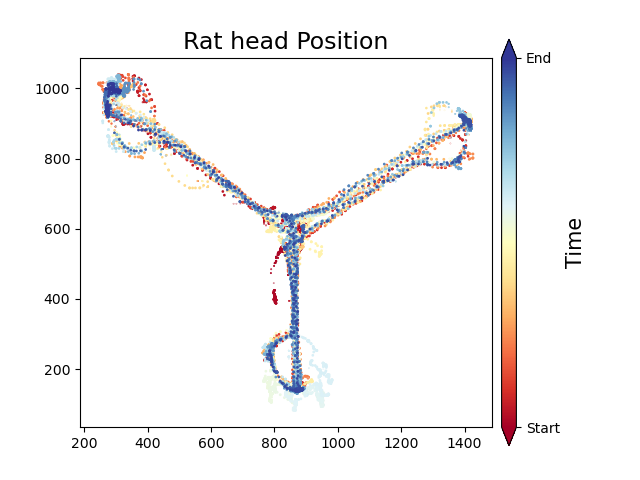

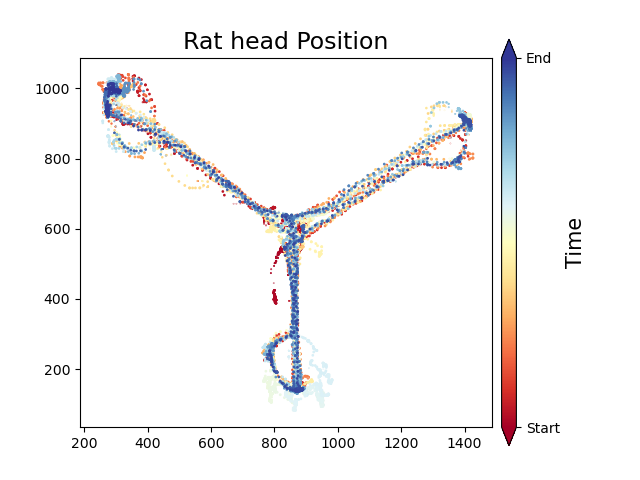

In [10]:
fpath = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
clst = ["head", "back", "rear", "tail"]
plotting_bodypart(fpath, "head")
obj_plotting_bodypart(fpath, "head")

In [11]:
def calculate_angle(ax, ay, bx, by, cx, cy):
    ang1 = np.arctan2(ay-by, ax-bx)
    ang2 = np.arctan2(cy-by, cx-bx)
    result = np.rad2deg((ang1 - ang2) % (2 * np.pi))
    return(result)

In [12]:
ax = np.array([0, 2.1, 1.3, 9])
ay = np.array([5, 2, 42.23, 6])
bx = np.array([0, 2, 654.8, 8])
by = np.array([0, 2, 79.77, 6])
cx = np.array([9, 2, 78966, 7])
cy = np.array([0, 2.001, 3, 6])

print(calculate_angle(ax, ay, bx, by, cx, cy))

[ 90.         270.         183.34388408 180.        ]


In [47]:
# Plot a graph of bodypart's position in respect to time
def obj_plotting_angle(csvpath, pos1, pos2, pos3, df = None):
    
    # If a dataframe is not provided, load the csv file and format it with format_csv
    if df == None:
        file = format_csv(csvpath)
    else:
        file = df
    
    # Select the columns needed
    pos1x = pos1 + "_x"
    pos1y = pos1 + "_y"
    pos2x = pos2 + "_x"
    pos2y = pos2 + "_y"
    pos3x = pos3 + "_x"
    pos3y = pos3 + "_y"

    # Convert data to float arrays for graphing
    x1 = file[pos1x].to_numpy().astype(float)
    y1 = file[pos1y].to_numpy().astype(float)
    x2 = file[pos2x].to_numpy().astype(float)
    y2 = file[pos2y].to_numpy().astype(float)
    x3 = file[pos3x].to_numpy().astype(float)
    y3 = file[pos3y].to_numpy().astype(float)
    timelst = df["bodyparts_coords"].to_numpy().astype(float)

    # Calculate angle
    angles = calculate_angle(x1, y1, x2, y2, x3, y3)
    
    # Plot the data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plot = ax.plot(timelst, angles, "-b")
    ax.set_title("Rat " + pos2 + " Angle", fontdict = {'fontsize': 17})


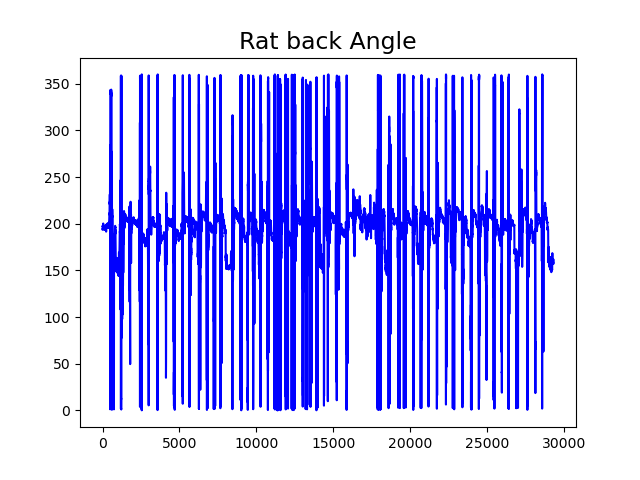

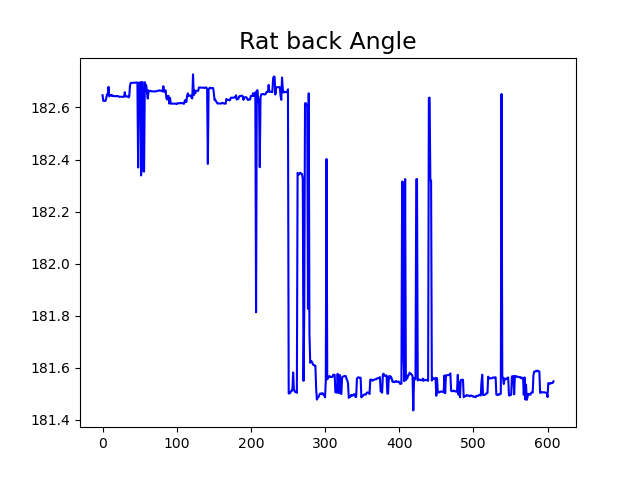

In [14]:
fpath1 = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
fpath2 = "/Users/bojunfeng/Desktop/test_clipDLC_dlcrnetms5_Rat_Memory_FormationJan11shuffle1_10_el.csv"
fpath3 = "/Users/bojunfeng/Downloads/demo-David-2022-01-22/videos/test_clipDLC_resnet50_demoJan22shuffle1_4000_filtered.csv" 


clst = ["head", "back", "rear", "tail"]
clst1 = ["head", "back", "tail_base", "tail_end"]

obj_plotting_angle(fpath1, clst[0], clst[1], clst[2])
obj_plotting_angle(fpath2, clst1[0], clst1[1], clst1[2])

In [15]:
# Return the angle dataframe column with the title pos2_angle
def get_angle(csvpath, pos1, pos2, pos3, title = None):
    
    # If a dataframe is not provided, load the csv file and format it with format_csv
    if df == None:
        file = format_csv(csvpath)
    else:
        file = df
    
    # Select the columns needed
    pos1x = pos1 + "_x"
    pos1y = pos1 + "_y"
    pos2x = pos2 + "_x"
    pos2y = pos2 + "_y"
    pos3x = pos3 + "_x"
    pos3y = pos3 + "_y"

    # Convert data to float arrays
    x1 = file[pos1x].to_numpy().astype(float)
    y1 = file[pos1y].to_numpy().astype(float)
    x2 = file[pos2x].to_numpy().astype(float)
    y2 = file[pos2y].to_numpy().astype(float)
    x3 = file[pos3x].to_numpy().astype(float)
    y3 = file[pos3y].to_numpy().astype(float)

    # Calculate angle
    angles = calculate_angle(x1, y1, x2, y2, x3, y3)
    
    if title == None:
        title = pos2 + "_angle"
        return pd.DataFrame({ title : angles })
    else:
        return pd.DataFrame({ title : angles })

In [16]:
fpath1 = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
fpath2 = "/Users/bojunfeng/Desktop/test_clipDLC_dlcrnetms5_Rat_Memory_FormationJan11shuffle1_10_el.csv"
fpath3 = "/Users/bojunfeng/Downloads/demo-David-2022-01-22/videos/test_clipDLC_resnet50_demoJan22shuffle1_4000_filtered.csv" 


clst = ["head", "back", "rear", "tail"]
clst1 = ["head", "back", "tail_base", "tail_end"]

y = get_angle(fpath1, clst[0], clst[1], clst[2])

y

,back_angle
0,194.095339
1,193.599033
2,193.594648
3,193.567609
4,193.478202
...,...
29302,158.652456
29303,157.651609
29304,157.555680
29305,157.574971


In [17]:
# Calculate the distance between two points
def calculate_distance(ax, ay, bx, by):
    x_diff = abs(ax-bx)
    y_diff = abs(ay-by)
    output_squared = (x_diff * x_diff) + (y_diff * y_diff)
    result = np.sqrt(output_squared)
    return(result)

In [18]:
ax = np.array([0, 2.1, 1.3, 9])
ay = np.array([5, 2, 42.23, 6])
bx = np.array([0, 2, 654.8, 8])
by = np.array([0, 2, 79.77, 6])
print(calculate_distance(ax, ay, bx, by))

[5.00000000e+00 1.00000000e-01 6.54577346e+02 1.00000000e+00]


In [19]:
# Return the angle dataframe column with the title pos1_pos2_distance
def get_distance(csvpath, pos1, pos2, title = None, df = None):
    
    # If a dataframe is not provided, load the csv file and format it with format_csv
    if df == None:
        file = format_csv(csvpath)
    else:
        file = df
    
    # Select the columns needed
    pos1x = pos1 + "_x"
    pos1y = pos1 + "_y"
    pos2x = pos2 + "_x"
    pos2y = pos2 + "_y"

    # Convert data to float arrays
    x1 = file[pos1x].to_numpy().astype(float)
    y1 = file[pos1y].to_numpy().astype(float)
    x2 = file[pos2x].to_numpy().astype(float)
    y2 = file[pos2y].to_numpy().astype(float)

    # Calculate angle
    distances = calculate_distance(x1, y1, x2, y2)
    
    if title == None:
        title = pos1 + "_" + pos2 + "_distance"
        return pd.DataFrame({ title : distances })
    else:
        return pd.DataFrame({ title : distances })

In [20]:
fpath1 = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
fpath2 = "/Users/bojunfeng/Desktop/test_clipDLC_dlcrnetms5_Rat_Memory_FormationJan11shuffle1_10_el.csv"
fpath3 = "/Users/bojunfeng/Downloads/demo-David-2022-01-22/videos/test_clipDLC_resnet50_demoJan22shuffle1_4000_filtered.csv" 


clst = ["head", "back", "rear", "tail"]
clst1 = ["head", "back", "tail_base", "tail_end"]

y = get_distance(fpath1, clst[0], clst[1])

y

,head_back_distance
0,77.589706
1,79.845662
2,79.831762
3,79.728164
4,79.520589
...,...
29302,100.192386
29303,99.401353
29304,99.410387
29305,98.826377


In [21]:
def get_bofy_info(csvpath, clst, df = None):
    
    # Get the bodypart information
    if df == None:
        dis1 = get_distance(csvpath, clst[0], clst[1])
        dis2 = get_distance(csvpath, clst[1], clst[2])
        dis3 = get_distance(csvpath, clst[2], clst[3])
        ang1 = get_angle(csvpath, clst[0], clst[1], clst[2])
        ang2 = get_angle(csvpath, clst[1], clst[2], clst[3])
    else:
        dis1 = get_distance(csvpath, clst[0], clst[1], df)
        dis2 = get_distance(csvpath, clst[1], clst[2], df)
        dis3 = get_distance(csvpath, clst[2], clst[3], df)
        ang1 = get_angle(csvpath, clst[0], clst[1], clst[2], df)
        ang2 = get_angle(csvpath, clst[1], clst[2], clst[3], df) 
    
    # Put them together
    output = pd.concat([dis1, dis2, dis3, ang1, ang2],axis=1)
    
    return output

In [22]:
fpath1 = "/Users/bojunfeng/Downloads/vidDLC_resnet50_testFeb5shuffle1_40000_filtered.csv"
clst = ["head", "back", "rear", "tail"]

body_info = get_bofy_info(fpath1, clst)

df = body_info.dropna()
df

,head_back_distance,back_rear_distance,rear_tail_distance,back_angle,rear_angle
0,77.589706,111.578182,71.690841,194.095339,169.203801
1,79.845662,110.819286,72.384081,193.599033,169.283879
2,79.831762,110.818536,72.357218,193.594648,169.252295
3,79.728164,111.579615,71.564649,193.567609,169.114504
4,79.520589,111.558298,71.694753,193.478202,168.408494
...,...,...,...,...,...
29302,100.192386,128.443129,153.496118,158.652456,175.612467
29303,99.401353,128.360141,153.520106,157.651609,175.669027
29304,99.410387,128.317224,153.520071,157.555680,175.691846
29305,98.826377,128.014874,153.524742,157.574971,175.848268
